<a href="https://www.kaggle.com/code/averma111/pytorch-ps-s3e14?scriptVersionId=129096823" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import torch
warnings.filterwarnings('ignore')
seed = 17
torch.manual_seed(seed)
np.random.seed(seed)
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
sns.set_style("darkgrid")
pd.set_option('mode.chained_assignment',None)
from tqdm.notebook import tqdm
import torch.nn.functional as F

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Assigning the directory and file paths

In [3]:
train_file = '/kaggle/input/playground-series-s3e14/train.csv'
test_file = '/kaggle/input/playground-series-s3e14/test.csv'
original = '/kaggle/input/wild-blueberry-yield-prediction/Data in Brief/Data in Brief/WildBlueberryPollinationSimulationData.csv'

## Reading the datasets

In [4]:
def get_datasets(filename):
    df = pd.read_csv(filename)
    return df

In [5]:
get_datasets(train_file).head()

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417


In [6]:
get_datasets(test_file).head()

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
0,15289,25.0,0.25,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.399367,0.408088,31.394569
1,15290,12.5,0.25,0.25,0.75,0.63,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.488048,0.442866,36.846956
2,15291,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.583379,0.487057,40.037644
3,15292,25.0,0.50,0.38,0.38,0.63,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.433014,0.422847,33.116091
4,15293,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,24.0,0.39,0.360996,0.388860,29.558019


In [7]:
get_datasets(original).head()

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.410652,0.408159,31.678898,3813.165795
1,1,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.444254,0.425458,33.449385,4947.605663
2,2,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.383787,0.399172,30.546306,3866.798965
3,3,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.407564,0.408789,31.562586,4303.943030
4,4,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.354413,0.382703,28.873714,3436.493543


## Drop unwanted columns

In [8]:
def drop_columns(col_name,dataframe):
    dataframe.drop(col_name,axis=1,inplace=True)
    return dataframe

train = drop_columns('id',get_datasets(train_file))
original = drop_columns('Row#',get_datasets(original))

## Concate original and train datasets

In [9]:
def concat_dataframe(df1,df2):
    return pd.concat([df1,df2])

df_full = concat_dataframe(train, original)

## Defining the summary function

In [10]:
def summary(text, df):
    print(f'{text} shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes, columns=['dtypes'])
    summ['null'] = df.isnull().sum()
    summ['unique'] = df.nunique()
    summ['min'] = df.min()
    summ['median'] = df.median()
    summ['max'] = df.max()
    summ['mean'] = df.mean()
    summ['std'] = df.std()
    summ['inf'] = np.isinf(df).sum().sum()
    summ['duplicate'] = df.duplicated().sum()
    return summ

##  Summary of the trained data

In [11]:
summary('full_dataset',df_full)

full_dataset shape: (16066, 17)


,dtypes,null,unique,min,median,max,mean,std,inf,duplicate
clonesize,float64,0,6,10.000000,25.000000,40.000000,19.659374,6.618134,0,7
honeybee,float64,0,7,0.000000,0.500000,18.430000,0.390660,0.413259,0,7
bumbles,float64,0,12,0.000000,0.250000,0.585000,0.286556,0.060249,0,7
andrena,float64,0,17,0.000000,0.500000,0.750000,0.491522,0.148849,0,7
osmia,float64,0,16,0.000000,0.630000,0.750000,0.590890,0.141209,0,7
MaxOfUpperTRange,float64,0,6,69.700000,86.000000,94.600000,82.175072,9.148725,0,7
MinOfUpperTRange,float64,0,5,39.000000,52.000000,57.200000,49.674599,5.548630,0,7
AverageOfUpperTRange,float64,0,5,58.200000,71.900000,79.000000,68.659486,7.643286,0,7
MaxOfLowerTRange,float64,0,6,50.200000,62.000000,68.200000,59.233400,6.612254,0,7
MinOfLowerTRange,float64,0,7,24.300000,30.000000,33.000000,28.661988,3.195960,0,7



* No null values. We therefore dont need to use imputation
* Categorical data ==> No Categorical data
* Data types are all float values excluding the target (integer)
* Data is reasonably small with only 15289 datapoints
* Duplicates: 7 duplicate

In [12]:
def drop_dups(df):
    return df.drop_duplicates()
df_full = drop_dups(df_full)

In [13]:
summary('full_dataset_no_dups',df_full)

full_dataset_no_dups shape: (16059, 17)


,dtypes,null,unique,min,median,max,mean,std,inf,duplicate
clonesize,float64,0,6,10.000000,25.000000,40.000000,19.657824,6.615589,0,0
honeybee,float64,0,7,0.000000,0.500000,18.430000,0.390628,0.413323,0,0
bumbles,float64,0,12,0.000000,0.250000,0.585000,0.286556,0.060249,0,0
andrena,float64,0,17,0.000000,0.500000,0.750000,0.491548,0.148837,0,0
osmia,float64,0,16,0.000000,0.630000,0.750000,0.590906,0.141169,0,0
MaxOfUpperTRange,float64,0,6,69.700000,86.000000,94.600000,82.174955,9.149359,0,0
MinOfUpperTRange,float64,0,5,39.000000,52.000000,57.200000,49.674525,5.549016,0,0
AverageOfUpperTRange,float64,0,5,58.200000,71.900000,79.000000,68.659381,7.643815,0,0
MaxOfLowerTRange,float64,0,6,50.200000,62.000000,68.200000,59.233315,6.612713,0,0
MinOfLowerTRange,float64,0,7,24.300000,30.000000,33.000000,28.661947,3.196182,0,0


## Feature Engineering

In [14]:
def generate_features(df):
    df["fruit_seed"] = df["fruitset"] * df["seeds"]
    df['insects'] = df['honeybee'] + df['bumbles'] + df['andrena'] + df['osmia']
    df["AverageTRange"]=(df["AverageOfUpperTRange"]+df["AverageOfLowerTRange"])/2
    return df

df_full=generate_features(df_full)


## Distribution plot  of the full dataset

* Distribution looks fairely normal with -negative skewness

<AxesSubplot: xlabel='yield', ylabel='Density'>

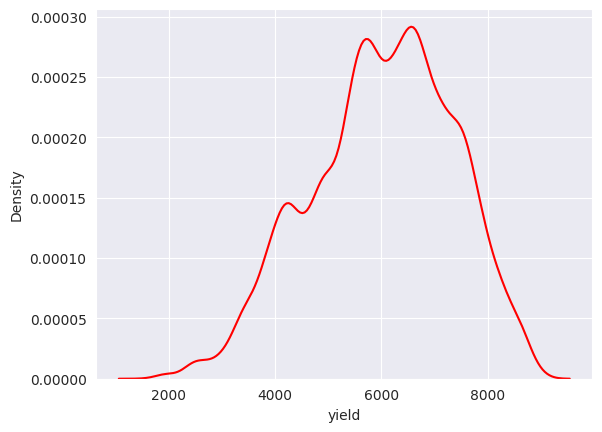

In [15]:
sns.kdeplot(df_full,x='yield',color='r')


## Distribution of Train vs Test data

* The distribution of Test and Train datasets seem to align

In [16]:
def generate_features_labels(df,target_name):
    if target_name =='yield':
        label = df[target_name]
        features=drop_columns(target_name,df)
        return features,label
    elif target_name=='test':
        features=df.loc[:, df.columns != 'id']
        return features

X,y = generate_features_labels(df_full,'yield')


## Distribution of Train and Test look synonimous

In [17]:
def plot_kde_train_test(features,test_df):
    fig,ax = plt.subplots(int(np.ceil(len(features.columns)/4)),4, figsize = (30,25))
    for i,col in enumerate(features.columns):
        ax = np.ravel(ax)
        sns.kdeplot(x= features[col] , label = 'Train', ax = ax[i],color='r')
        sns.kdeplot(x= test_df[col], label = 'Test', ax = ax[i] ,color='b')
        ax[i].legend()
        ax[i].set_title(f"col")

    plt.suptitle("Distribution of Train vs Test Dataset",fontsize = 30)
    plt.tight_layout(pad =3)
    plt.show()
    
plot_kde_train_test(X,test)

NameError: name 'test' is not defined

## Correlation Matrix

* Dataset looks highly correlated with target field

In [ ]:
def  plot_correlation_dataset(df):
    plt.figure(figsize = (25,12))
    corr = train.corr()
    upper_triangle = np.triu(np.ones_like(corr, dtype=bool))
    sns.heatmap(corr,vmin = -1, vmax = 1, cmap = "rocket", annot = True, mask = upper_triangle)
    plt.title("Correlation of all features and target", fontsize= 18)
    plt.show()
    
plot_correlation_dataset(X)

## Outlier Analaysis

In [ ]:
def show_outlier(features):
    fig,ax = plt.subplots(int(np.ceil(len(X.columns)/4)),4,figsize = (30,15))
    ax = np.ravel(ax)
    for i,col in enumerate(X.columns):
        sns.boxplot(ax = ax[i], x = X[col], color= "red")
    fig.suptitle("Box plots of all data ",fontsize = 20)
    plt.tight_layout(pad=3)
    plt.show()

show_outlier(X)

## Standardize the numerical features in the dataset

In [ ]:
def preprocessing(features,label,processing_type):
    scaler = StandardScaler()
    if processing_type == 'train' and label is not None:
        num_cols = list(features.select_dtypes(include=['int','float']))
        features = scaler.fit_transform(X[num_cols].values)
        return train_test_split(features,label.to_numpy(),test_size=0.2,random_state=42)
    elif processing_type =='test':
        num_cols = list(features.select_dtypes(include=['int','float']))
        features = scaler.fit_transform(X[num_cols].values)
        return features

X_train,X_test,y_train,y_test = preprocessing(X,y,'train')
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

## Defining the Dataset classes for test and train

In [ ]:
class Data(Dataset):
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
            return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)

X_data = torch.tensor(data=X_train,dtype=torch.float32,requires_grad=True)
y_data = torch.tensor(data=y_train,dtype=torch.float32,requires_grad=True)
X_test = torch.tensor(data=X_test,dtype=torch.float32,requires_grad=True)
y_test = torch.tensor(data=y_test,dtype=torch.float32,requires_grad=True)
train_data = Data(X_data,y_data)
test_data = Data(X_test,y_test)

## Creating the baseline model

In [ ]:
class RegressionBaseModel(torch.nn.Module):
    
    def training_step(self,batch):
        features,labels = batch
        out = self(features)
        loss = F.l1_loss(out,labels.unsqueeze(1))
        return loss
    
    def test_step(self, batch):
        features, labels = batch 
        out = self(features)                    
        loss = F.l1_loss(out, labels.unsqueeze(1))          
        return {'test_loss': loss.detach()}
        
    def test_epoch_end(self, outputs):
        batch_losses = [x['test_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   
        return {'test_loss': epoch_loss.item()}
    
    
    def epoch_end(self, epoch, result):
        if epoch %10 ==0:
            print("Epoch [{}], train_loss: {:.5f}, test_loss: {:.5f}".format(
                epoch, result['train_loss'], result['test_loss']))


In [ ]:
class RegressionBlueBerryNNet(RegressionBaseModel):
    def __init__(self,input_features):
        super().__init__()
        self.network = torch.nn.Sequential(
        torch.nn.Linear(input_features,1),
        torch.nn.ReLU()
        )      
    
    def forward(self,inputs):
        return self.network(inputs)

## Defining the code to run both on CPU and GPU

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

## Instantiating the model

In [ ]:
model = RegressionBlueBerryNNet(X_train.shape[1])
model.to(device)

print(model)

## Hyper parameter tunning 

In [ ]:
BATCH_SIZE = 32
EPOCHS = 100
LEARNING_RATE = 0.1
MOMENTUM = 0.9
OPT_FUNC= torch.optim.SGD


## Creating the Dataloader for train and test 

In [ ]:
def get_dataloaders(dataset_type,batch,shuffle):
    if shuffle:
         return DataLoader(dataset=dataset_type, batch_size=batch, shuffle=shuffle)
    else:
        return DataLoader(dataset=dataset_type, batch_size=batch,shuffle=shuffle)

## Traning the Model :)

In [ ]:
@torch.no_grad()
def evaluate(model, test_loader):
    model.eval()
    outputs = [model.test_step(batch) for batch in test_loader]
    return model.test_epoch_end(outputs)

  
def fit(epochs, lr, model, train_loader, test_loader, opt_func = torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(),lr,MOMENTUM)
    for epoch in tqdm(range(epochs)):
        model.train()
        train_losses = []
        for batch in train_loader:
            optimizer.zero_grad()
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            
        result = evaluate(model, test_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    
    return history

In [ ]:
train_dataloader = get_dataloaders(train_data,BATCH_SIZE,True)
test_dataloader = get_dataloaders(test_data,BATCH_SIZE,False)
history = fit(EPOCHS, LEARNING_RATE, model, train_dataloader, test_dataloader,OPT_FUNC)

In [ ]:
def plot_losses(history):
    """ Plot the losses in each epoch"""
    train_losses = [x.get('train_loss') for x in history]
    test_losses = [x['test_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(test_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Testing'])
    plt.title('Loss vs. No. of epochs');

plot_losses(history)

## Executing model on test data

In [ ]:
test_df=get_datasets(test_file)
test_features=generate_features(test_df)

### Checking the summary of the test data

In [ ]:
summary('test',test_features)

## Creating the Test variable 

In [ ]:
X_val=generate_features_labels(test_features,'test')

In [ ]:
X_val = drop_dups(X_val)

## Standardizing the test data as train data

In [ ]:
X_numerical_test=preprocessing(X_val,'','test')

## Defining the Test Dataset class

In [ ]:
# Test Data   
class Data_Test(Dataset):
    
    def __init__(self, X_test_data):
        self.X_test_data = X_test_data
        
    def __getitem__(self, index):
        return self.X_test_data[index]
        
    def __len__ (self):
        return len(self.X_test_data)

## Generating the yield values for test data

In [ ]:
def eval_test_data(model,testing_data_dl):
    yield_target = []
    model.eval()
    with torch.no_grad():
        for X_batch_test in testing_data_dl:
            X_batch_test = X_batch_test.to(device)
            y_test_pred = model(X_batch_test)
            y_pred_tag = torch.round(y_test_pred)
            yield_target.append(y_pred_tag.cpu().numpy())
    return yield_target



## Creating the submission file

In [ ]:
testing_data = Data_Test(torch.tensor(data=X_numerical_test,dtype=torch.float32))
testing_data_loader = DataLoader(dataset=testing_data, batch_size=BATCH_SIZE)

In [ ]:
yield_submission=[]
def submit_test_data():
    for elements in [a.squeeze().tolist() for a in eval_test_data(model,testing_data_loader)]: 
        for field in elements:
            yield_submission.append(field)        
    return yield_submission

In [ ]:
yhat = submit_test_data()
print(yhat)
df_submit = pd.DataFrame(data={'id': test_features['id'],'yield': yhat})
df_submit.to_csv('submission.csv', index=False)
df_submit.head()